<a id='Top'></a>
# 9. Transforming Sequences
<div class="alert alert-block alert-danger" style="margin-top: 10px">
<font color=black>

- 9.1. [Introduction: Transforming Sequences](#9.1)
  - 9.1.1. [Learning Goals](#9.1.1)
  - 9.1.2. [Objectives](#9.1.2)
- 9.2. [Mutability](#9.2)
  - 9.2.1. [Lists are Mutable](#9.2.1)
  - 9.2.2. [Strings are Immutable](#9.2.2)
  - 9.2.3. [Tuples are Immutable](#9.2.3)
- 9.3. [List Element Deletion](#9.3)
- 9.4. [Objects and References](#9.4)
- 9.5. [Aliasing](#9.5)
- 9.6. [Cloning Lists](#9.6)
- 9.7. [Mutating Methods](#9.7)
  - 9.7.1. [List Methods](#9.7.1)
- 9.8. [Append versus Concatenate](#9.8)
- 9.9. [Non-mutating Methods on Strings](#9.9)
  - 9.9.1. [String Format Method](#9.9.1)
- 9.10. [The Accumulator Pattern with Lists](#9.10)
- 9.11. [The Accumulator Pattern with Strings](#9.11)
- 9.12. 👩‍💻 [Accumulator Pattern Strategies](#9.12)
  - 9.12.1. [When to Use it](#9.12.1)
  - 9.12.2. [Before Writing it](#9.12.2)
  - 9.12.3. [Choosing Good Accumulator and Iterator Variable Names](#9.12.3)
- 9.13. 👩‍💻 [Don’t Mutate A List That You Are Iterating Through](#9.13)
- 9.14. [Summary](#9.14)
- 9.15. [Exercises](#9.15)
- 9.16. [Chapter Assessment - List Methods](#9.16)
  - 9.16.1. [Chapter Assessment - Aliases and References](#9.16.1)
  - 9.16.2. [Chapter Assessment - Split and Join](#9.16.2)
  - 9.16.3. [Chapter Assessment - For Loop Mechanics](#9.16.3)
  - 9.16.4. [Chapter Assessment - Accumulator Pattern](#9.16.4)
  - 9.16.5. [Chapter Assessment - Problem Solving](#9.16.5)</div>

<a id='9.1'></a>
## 9.1. Introduction: Transforming Sequences
The sequences that we have used so far have been static: a list of colors that doesn’t change or the characters in a string that stays the same. The real world is more complicated than that. A list of users for your social network may need to grow to accommodate new users (or shrink when users leave your service). The letters in a string may need to be modified to personalize a message (“Welcome to Wonderland, \<your name>”), or to encode a secret message.

The following chapter will detail more of the methods that can be used to transform lists and strings. Generally, the two methods that can be used are changing the list object, in place, by mutating it; or by constructing a new string object using a copy-with-change operation.

<a id='9.1.1'></a>
### 9.1.1. Learning Goals
[Back to top](#Top)
    
- To understand the concepts of mutable and immutable data types
- To understand that methods on strings leave the origninal string alone but return a new string
- To understand that lists are mutable data types and that mutating methods on lists return None

<a id='9.1.2'></a>
### 9.1.2. Objectives
[Back to top](#Top)
    
Demonstrate the correct use of:

- concatenate
- index operator
- substring (slice)
- search - contains in / not in and index
- find method
- append
- join
- split
- string format method

<a id='9.2'></a>
## 9.2. Mutability
[Back to top](#Top)
    
Some Python collection types - strings and lists so far - are able to change and some are not. If a type is able to change, then it is said to be mutable. If the type is not able to change then it is said to be immutable. This will be expanded below.

In [1]:
# Run this cell to see the video

from IPython.display import Video
Video("_videos/AC101 Mutability.mp4")  

<a id='9.2.1'></a>
### 9.2.1. Lists are Mutable
[Back to top](#Top)

Unlike strings, lists are __mutable__. This means we can change an item in a list by accessing it directly as part of the assignment statement. Using the indexing operator (square brackets) on the left side of an assignment, we can update one of the list items.

In [ ]:
fruit = ["banana", "apple", "cherry"]
print(fruit)
fruit[0] = "pear"
fruit[-1] = "orange"
print(fruit)

An assignment to an element of a list is called item assignment. Item assignment does not work for strings. Recall that strings are immutable.

Here is the same example in codelens so that you can step through the statements and see the changes to the list elements.

By combining assignment with the slice operator we can update several elements at once.

In [ ]:
alist = ['a', 'b', 'c', 'd', 'e', 'f']
alist[1:3] = ['x', 'y']
print(alist)

We can also remove elements from a list by assigning the empty list to them.

In [ ]:
alist = ['a', 'b', 'c', 'd', 'e', 'f']
alist[1:3] = []
print(alist)

We can even insert elements into a list by squeezing them into an empty slice at the desired location.

In [ ]:
alist = ['a', 'd', 'f']
alist[1:1] = ['b', 'c']
print(alist)
alist[4:4] = ['e']
print(alist)

<a id='9.2.2'></a>
### 9.2.2. Strings are Immutable
[Back to top](#Top)

One final thing that makes strings different from some other Python collection types is that you are not allowed to modify the individual characters in the collection. It is tempting to use the <font color=red>[]</font> operator on the left side of an assignment, with the intention of changing a character in a string. For example, in the following code, we would like to change the first letter of <font color=red>greeting</font>.

In [ ]:
greeting = "Hello, world!"
greeting[0] = 'J'            # ERROR!
print(greeting)

Instead of producing the output <font color=red>Jello, world!</font>, this code produces the runtime error <font color=red>TypeError: 'str' object does not support item assignment</font>.

Strings are __immutable__, which means you cannot change an existing string. The best you can do is create a new string that is a variation on the original.

In [ ]:
greeting = "Hello, world!"
newGreeting = 'J' + greeting[1:]
print(newGreeting)
print(greeting)          # same as it was

The solution here is to concatenate a new first letter onto a slice of <font color=red>greeting</font>. This operation has no effect on the original string.

While it’s possible to make up new variable names each time we make changes to existing values, it could become difficult to keep track of them all.

In [ ]:
phrase = "many moons"
phrase_expanded = phrase + " and many stars"
phrase_larger = phrase_expanded + " litter"
phrase_complete = "M" + phrase_larger[1:] + " the night sky."
excited_phrase_complete = phrase_complete[:-1] + "!"

The more that you change the string, the more difficult it is to come up with a new variable to use. It’s perfectly acceptable to re-assign the value to the same variable name in this case.

<a id='9.2.3'></a>
### 9.2.3. Tuples are Immutable
[Back to top](#Top)

As with strings, if we try to use item assignment to modify one of the elements of a tuple, we get an error. In fact, that’s the key difference between lists and tuples: tuples are like immutable lists. None of the operations on lists that mutate them are available for tuples. Once a tuple is created, it can’t be changed.

In [ ]:
julia[0] = 'X'  # TypeError: 'tuple' object does not support item assignment

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements?

In [ ]:
alist = [4,2,8,6,5]
alist[2] = True
print(alist)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
A. [4,2,True,8,6,5]  
B. [4,2,True,6,5]  
C. Error, it is illegal to assign

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. [4,2,True,6,5]  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, the value True is placed in the list at index 2. It replaces 8.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. What is printed by the following statements:

In [ ]:
s = "Ball"
s[0] = "C"
print(s)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. Ball  
B. Call  
C. Error

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. Error  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, strings are immutable.

</details>

<a id='9.3'></a>
## 9.3. List Element Deletion
[Back to top](#Top)

Using slices to delete list elements can be awkward and therefore error-prone. Python provides an alternative that is more readable. The del statement removes an element from a list by using its position.

In [ ]:
a = ['one', 'two', 'three']
del a[1]
print(a)

alist = ['a', 'b', 'c', 'd', 'e', 'f']
del alist[1:5]
print(alist)

As you might expect, <font color=red>del</font> handles negative indices and causes a runtime error if the index is out of range. In addition, you can use a slice as an index for <font color=red>del</font>. As usual, slices select all the elements up to, but not including, the second index.

<a id='9.4'></a>
## 9.4. Objects and References
[Back to top](#Top)

If we execute these assignment statements,

In [ ]:
a = "banana"
b = "banana

we know that <font color=red>a</font> and <font color=red>b</font> will refer to a string with the letters <font color=red>"banana"</font>. But we don’t know yet whether they point to the same string.

There are two possible ways the Python interpreter could arrange its internal states:
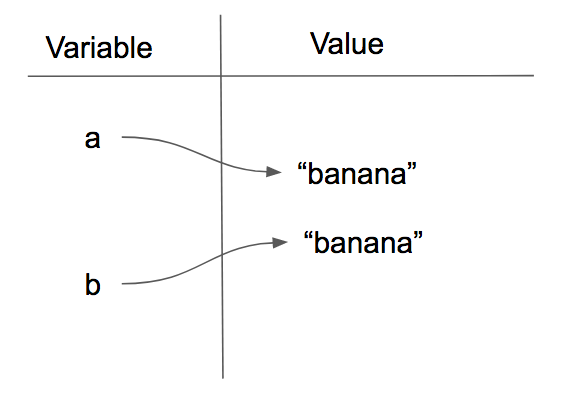

or
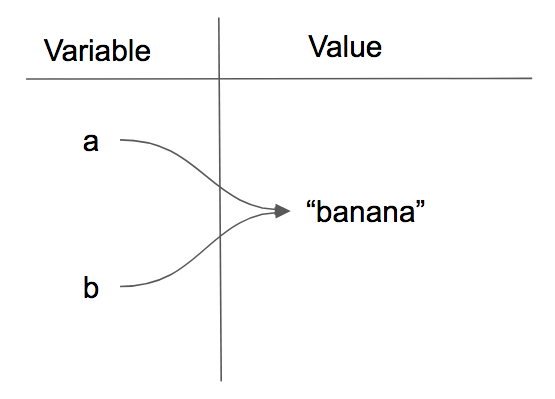

In one case, <font color=red>a</font> and <font color=red>b</font> refer to two different string objects that have the same value. In the second case, they refer to the same object. Remember that an object is something a variable can refer to.

We can test whether two names refer to the same object using the is operator. The is operator will return true if the two references are to the same object. In other words, the references are the same. Try our example from above.

In [ ]:
a = "banana"
b = "banana"

print(a is b)

The answer is <font color=red>True</font>. This tells us that both <font color=red>a</font> and <font color=red>b</font> refer to the same object, and that it is the second of the two reference diagrams that describes the relationship. Python assigns every object a unique id and when we ask <font color=red>a is b</font> what python is really doing is checking to see if id(a) == id(b).

In [ ]:
a = "banana"
b = "banana"

print(id(a))
print(id(b))

Since strings are *immutable*, the Python interpreter often optimizes resources by making two names that refer to the same string value refer to the same object. You shouldn’t count on this (that is, use <font color=red>==</font> to compare strings, not <font color=red>is</font>), but don’t be surprised if you find that two variables,each bound to the string “banana”, have the same id..

This is not the case with lists, which never share an id just because they have the same contents. Consider the following example. Here, <font color=red>a</font> and <font color=red>b</font> refer to two different lists, each of which happens to have the same element values. They need to have different ids so that mutations of list <font color=red>a</font> do not affect list <font color=red>b</font>.

In [ ]:
a = [81,82,83]
b = [81,82,83]

print(a is b)
print(a == b)
print(id(a))
print(id(b))

The reference diagram for this example looks like this:
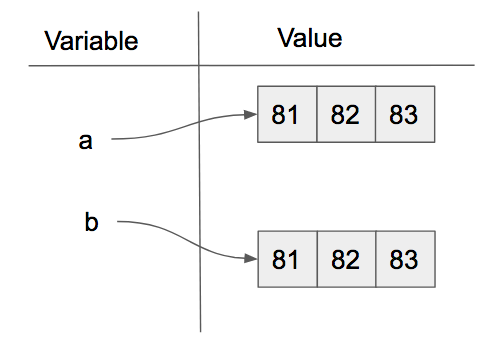
<font color=red>a</font> and <font color=red>b</font> have equivalent values but do not refer to the same object. Because their contents are equivalent, a==b evaluates to True; because they are not the same object, a is b evaluates to False.

<a id='9.5'></a>
## 9.5. Aliasing
[Back to top](#Top)

Since variables refer to objects, if we assign one variable to another, both variables refer to the same object:

In [ ]:
a = [81, 82, 83]
b = a
print(a is b)

In this case, the reference diagram looks like this:
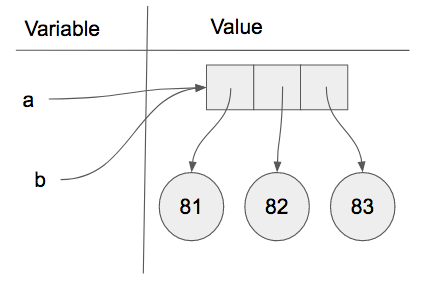
Because the same list has two different names, <font color=red>a</font> and <font color=red>b</font>, we say that it is aliased. Changes made with one alias affect the other. In the codelens example below, you can see that <font color=red>a</font> and <font color=red>b</font> refer to the same list after executing the assignment statement <font color=red>b = a</font>.

In [ ]:
a = [81,82,83]
b = [81,82,83]
print(a is b)

b = a
print(a == b)
print(a is b)

b[0] = 5
print(a)

Although this behavior can be useful, it is sometimes unexpected or undesirable. In general, it is safer to avoid aliasing when you are working with mutable objects. Of course, for immutable objects, there’s no problem. That’s why Python is free to alias strings and integers when it sees an opportunity to economize.

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is the value of y after the following code has been evaluated:

In [ ]:
w = ['Jamboree', 'get-together', 'party']
y = ['celebration']
y = w

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. ['Jamboree', 'get-together', 'party']  
B. ['celebration']  
C. ['celebration', 'Jamboree', 'get-together', 'party']  
D. ['Jamboree', 'get-together', 'party', 'celebration']

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. ['Jamboree', 'get-together', 'party']  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, the value of y has been reassigned to the value of w.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. What is printed by the following statements?

In [ ]:
alist = [4,2,8,6,5]
blist = alist
blist[3] = 999
print(alist)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. [4,2,8,6,5]  
B. [4,2,8,999,5]

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. [4,2,8,999,5]  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, since alist and blist both reference the same list, changes to one also change the other.

</details>

<a id='9.6'></a>
## 9.6. Cloning Lists
[Back to top](#Top)

If we want to modify a list and also keep a copy of the original, we need to be able to make a copy of the list itself, not just the reference. This process is sometimes called __cloning__, to avoid the ambiguity of the word copy.

The easiest way to clone a list is to use the slice operator.

Taking any slice of <font color=red>a</font> creates a new list. In this case the slice happens to consist of the whole list.

In [ ]:
a = [81,82,83]
b = a[:]       # make a clone using slice
print(a == b)
print(a is b)

b[0] = 5

print(a)
print(b)

Now we are free to make changes to <font color=red>b</font> without worrying about <font color=red>a</font>. Again, we can clearly see in codelens that <font color=red>a</font> and <font color=red>b</font> are entirely different list objects.

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements?

In [ ]:
alist = [4,2,8,6,5]
blist = alist * 2
blist[3] = 999
print(alist)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. [4,2,8,999,5,4,2,8,6,5]  
B. [4,2,8,999,5]  
C. [4,2,8,6,5]

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. [4,2,8,6,5]  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, alist was unchanged by the assignment statement. blist was a copy of the references in alist.

</details>

<a id='9.7'></a>
## 9.7. Mutating Methods
[Back to top](#Top)

You’ve seen some methods already, like the <font color=red>count</font> and <font color=red>index</font> methods. Methods are either mutating or non-mutating. Mutating methods are ones that change the object after the method has been used. Non-mutating methods do not change the object after the method has been used.

The <font color=red>count</font> and <font color=red>index</font> methods are both non-mutating. Count returns the number of occurances of the argument given but does not change the original string or list. Similarly, index returns the leftmost occurance of the argument but does not change the original string or list. Below we’ll talk about list methods in general. Keep an eye out for methods that are mutating!

<a id='9.7.1'></a>
### 9.7.1. List Methods
[Back to top](#Top)

The dot operator can also be used to access built-in methods of list objects. <font color=red>append</font> is a list method which adds the argument passed to it to the end of the list. Continuing with this example, we show several other list methods. Many of them are easy to understand.

In [ ]:
mylist = []
mylist.append(5)
mylist.append(27)
mylist.append(3)
mylist.append(12)
print(mylist)

mylist.insert(1, 12)
print(mylist)
print(mylist.count(12))
print(mylist.index(3))
print(mylist.count(5))

mylist.reverse()
print(mylist)

mylist.sort()
print(mylist)

mylist.remove(5)
print(mylist)

lastitem = mylist.pop()
print(lastitem)
print(mylist)

There are two ways to use the <font color=red>pop</font> method. The first, with no parameter, will remove and return the last item of the list. If you provide a parameter for the position, <font color=red>pop</font> will remove and return the item at that position. Either way the list is changed.

The following table provides a summary of the list methods shown above. The column labeled <font color=red>result</font> gives an explanation as to what the return value is as it relates to the new value of the list. The word __mutator__ means that the list is changed by the method but nothing is returned (actually <font color=red>None</font> is returned). A __hybrid__ method is one that not only changes the list but also returns a value as its result. Finally, if the result is simply a return, then the list is unchanged by the method.

Be sure to experiment with these methods to gain a better understanding of what they do.

|Method|Parameters|Result|Description|
|:----:|:--------:|:----:|:---------:|
|append|item|mutator|Adds a new item to the end of a list|
|insert|position, item|mutator|Inserts a new item at the position given|
|pop|none|hybrid|Removes and returns the last item|
|pop|position|hybrid|Removes and returns the item at position|
|sort|none|mutator|Modifies a list to be sorted|
|reverse|none|mutator|Modifies a list to be in reverse order|
|index|item|return idx|Returns the position of first occurrence of item|
|count|item|return ct|Returns the number of occurrences of item|
|remove|item|mutator|Removes the first occurrence of item|

Details for these and others can be found in the [<font color=blue>Python Documentation</font>](http://docs.python.org/py3k/library/stdtypes.html#sequence-types-str-bytes-bytearray-list-tuple-range).

It is important to remember that methods like <font color=red>append</font>, <font color=red>sort</font>, and <font color=red>reverse</font> all return <font color=red>None</font>. They change the list; they don’t produce a new list. So, while we did reassignment to increment a number, as in <font color=red>x = x + 1</font>, doing the analogous thing with these operations will lose the entire list contents (see line 8 below).

In [ ]:
mylist = []
mylist.append(5)
mylist.append(27)
mylist.append(3)
mylist.append(12)
print(mylist)

mylist = mylist.sort()   #probably an error
print(mylist)

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements?

In [ ]:
alist = [4,2,8,6,5]
alist.append(True)
alist.append(False)
print(alist)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. [4,2,8,6,5,False,True]  
B. [4,2,8,6,5,True,False]  
C. [True,False,4,2,8,6,5]

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. [4,2,8,6,5,True,False]  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️  Yes, each item is added to the end of the list.

</details>

<a id='9.8'></a>
## 9.8. Append versus Concatenate
[Back to top](#Top)

The <font color=red>append</font> method adds a new item to the end of a list. It is also possible to add a new item to the end of a list by using the concatenation operator. However, you need to be careful.

Consider the following example. The original list has 3 integers. We want to add the word “cat” to the end of the list.

In [ ]:
origlist = [45,32,88]
origlist.append("cat")

Here we have used <font color=red>append</font> which simply modifies the list. In order to use concatenation, we need to write an assignment statement that uses the accumulator pattern:

In [ ]:
origlist = origlist + ["cat"]

Note that the word “cat” needs to be placed in a list since the concatenation operator needs two lists to do its work.

It is also important to realize that with append, the original list is simply modified. On the other hand, with concatenation, an entirely new list is created. This can be seen in the following codelens example where"newlist" refers to a list which is a copy of the original list, <font color=red>origlist</font>, with the new item “cat” added to the end. <font color=red>origlist</font> still contains the three values it did before the concatenation. This is why the assignment operation is necessary as part of the accumulator pattern.

This might be difficult to understand since these two lists appear to be the same. In Python, every object has a unique identification tag. Likewise, there is a built-in function that can be called on any object to return its unique <font color=red>id</font>. The function is appropriately called id and takes a single parameter, the object that you are interested in knowing about. You can see in the example below that a real id is usually a very large integer value (corresponding to an address in memory). In the textbook though the number will likely be smaller.

In [ ]:
>>> alist = [4, 5, 6]
>>> id(alist)
4300840544
>>>

In [ ]:
origlist = [45,32,88]
print("origlist:", origlist)
print("the identifier:", id(origlist))             #id of the list before changes
newlist = origlist + ['cat']
print("newlist:", newlist)
print("the identifier:", id(newlist))              #id of the list after concatentation
origlist.append('cat')
print("origlist:", origlist)
print("the identifier:", id(origlist))             #id of the list after append is used

Note how even though <font color=red>newlist</font> and <font color=red>origlist</font> appear the same, they have different identifiers.

We have previously described x += 1 as a shorthand for x = x + 1. With lists, += is actually a little different. In particular, origlist += [“cat”] appends “cat” to the end of the original list object. If there is another alias for `origlist, this can make a difference, as in the code below. See if you can follow (or, better yet, predict, changes in the reference diagram).

We can use append or concatenate repeatedly to create new objects. If we had a string and wanted to make a new list, where each element in the list is a character in the string, where do you think you should start? In both cases, you’ll need to first create a variable to store the new object.

In [ ]:
st = "Warmth"
a = []

Then, character by character, you can add to the empty list. The process looks different if you concatentate as compared to using append.

In [ ]:
st = "Warmth"
a = []
b = a + [st[0]]
c = b + [st[1]]
d = c + [st[2]]
e = d + [st[3]]
f = e + [st[4]]
g = f + [st[5]]
print(g)

In [ ]:
st = "Warmth"
a = []
a.append(st[0])
a.append(st[1])
a.append(st[2])
a.append(st[3])
a.append(st[4])
a.append(st[5])
print(a)

This might become tedious though, and difficult if the length of the string is long. Can you think of a better way to do this?

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements?

In [ ]:
alist = [4,2,8,6,5]
alist = alist + 999
print(alist)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. [4,2,8,6,5,999]  
B. Error, you cannot concatenate a list with an integer.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. Error, you cannot concatenate a list with an integer.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️  Yes, in order to perform concatenation you would need to write alist+[999]. You must have two lists.

</details>

<a id='9.9'></a>
## 9.9. Non-mutating Methods on Strings
[Back to top](#Top)

There are a wide variety of methods for string objects. Try the following program.

In [ ]:
ss = "Hello, World"
print(ss.upper())

tt = ss.lower()
print(tt)
print(ss)

In this example, <font color=red>upper</font> is a method that can be invoked on any string object to create a new string in which all the characters are in uppercase. <font color=red>lower</font> works in a similar fashion changing all characters in the string to lowercase. (The original string <font color=red>ss</font> remains unchanged. A new string <font color=red>tt</font> is created.)

You’ve already seen a few methods, such as <font color=red>count</font> and <font color=red>index</font>, that work with strings and are non-mutating. In addition to those and <font color=red>upper</font> and <font color=red>lower</font>, the following table provides a summary of some other useful string methods. There are a few activecode examples that follow so that you can try them out.

|Method|Parameters|Description|
|:----:|:--------:|:---------:|
|upper|none|Returns a string in all uppercase|
|lower|none|Returns a string in all lowercase|
|count|item|Returns the number of occurrences of item|
|index|item|Returns the leftmost index where the substring item is found and causes a runtime error if item is not found|
|strip|none|Returns a string with the leading and trailing whitespace removed|
|replace|old, new|Replaces all occurrences of old substring with new|
|format|substitutions|Involved! See <font color=blue>String Format Method</font>, below|

You should experiment with these methods so that you understand what they do. Note once again that the methods that return strings do not change the original. You can also consult the [<font color=blue>Python documentation for strings</font>](http://docs.python.org/3/library/stdtypes.html#string-methods).

In [ ]:
ss = "    Hello, World    "
els = ss.count("l")
print(els)

print("***"+ss.strip()+"***")

news = ss.replace("o", "***")
print(news)

In [ ]:
food = "banana bread"
print(food.upper())

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements?

In [ ]:
s = "python rocks"
print(s.count("o") + s.count("p"))

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 0  
B. 2  
C. 3

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. 3  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, add the number of o characters and the number of p characters.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. What is printed by the following statements?

In [ ]:
s = "python rocks"
print(s[1]*s.index("n"))

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. yyyyy  
B. 55555  
C. n  
D. Error, you cannot combine all those things together.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. yyyyy  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, s[1] is y and the index of n is 5, so 5 y characters. It is important to realize that the index method has precedence over the repetition operator. Repetition is done last.

</details>

<a id='9.9.1'></a>
### 9.9.1. String Format Method
[Back to top](#Top)

Until now, we have created strings with variable content using the + operator to concatenate partial strings together. That works, but it’s very hard for people to read or debug a code line that includes variable names and strings and complex expressions. Consider the following:

In [ ]:
name = "Rodney Dangerfield"
score = -1  # No respect!
print("Hello " + name + ". Your score is " + str(score))

Or perhaps more realistically:

In [ ]:
scores = [("Rodney Dangerfield", -1), ("Marlon Brando", 1), ("You", 100)]
for person in scores:
    name = person[0]
    score = person[1]
    print("Hello " + name + ". Your score is " + str(score))

In this section, you will learn to write that in a more readable way:

In [ ]:
scores = [("Rodney Dangerfield", -1), ("Marlon Brando", 1), ("You", 100)]
for person in scores:
    name = person[0]
    score = person[1]
    print("Hello {}. Your score is {}.".format(name, score))

In grade school quizzes a common convention is to use fill-in-the blanks. For instance,

> #### Hello \_\_\_\_\_\_\_\_!

and you can fill in the name of the person greeted, and combine given text with a chosen insertion. *We use this as an analogy:* Python has a similar construction, better called fill-in-the-braces. The string method <font color=red>format</font>, makes substitutions into places in a string enclosed in braces. Run this code:

In [ ]:
person = input('Your name: ')
greeting = 'Hello {}!'.format(person)
print(greeting)

There are several new ideas here!

The string for the <font color=red>format</font> method has a special form, with braces embedded. Such a string is called a *format string*. Places where braces are embedded are replaced by the value of an expression taken from the parameter list for the <font color=red>format</font> method. There are many variations on the syntax between the braces. In this case we use the syntax where the first (and only) location in the string with braces has a substitution made from the first (and only) parameter.

In the code above, this new string is assigned to the identifier <font color=red>greeting</font>, and then the string is printed.

The identifier <font color=red>greeting</font> was introduced to break the operations into a clearer sequence of steps. However, since the value of <font color=red>greeting</font> is only referenced once, it can be eliminated with the more concise version:

In [ ]:
person = input('Enter your name: ')
print('Hello {}!'.format(person))

There can be multiple substitutions, with data of any type. Next we use floats. Try original price $2.50 with a 7% discount:

In [ ]:
origPrice = float(input('Enter the original price: $'))
discount = float(input('Enter discount percentage: '))
newPrice = (1 - discount/100)*origPrice
calculation = '${} discounted by {}% is ${}.'.format(origPrice, discount, newPrice)
print(calculation)

It is important to pass arguments to the <font color=red>format</font> method in the correct order, because they are matched *positionally* into the <font color=red>{}</font> places for interpolation where there is more than one.

If you used the data suggested, this result is not satisfying. Prices should appear with exactly two places beyond the decimal point, but that is not the default way to display floats.

Format strings can give further information inside the braces showing how to specially format data. In particular floats can be shown with a specific number of decimal places. For two decimal places, put <font color=red>:.2f</font> inside the braces for the monetary values:

In [ ]:
origPrice = float(input('Enter the original price: $'))
discount = float(input('Enter discount percentage: '))
newPrice = (1 - discount/100)*origPrice
calculation = '${:.2f} discounted by {}% is ${:.2f}.'.format(origPrice, discount, newPrice)
print(calculation)

The 2 in the format modifier can be replaced by another integer to round to that specified number of digits.

This kind of format string depends directly on the order of the parameters to the format method. There are other approaches that we will skip here, such as explicitly numbering substitutions.

It is also important that you give <font color=red>format</font> the same amount of arguments as there are <font color=red>{}</font> waiting for interpolation in the string. If you have a <font color=red>{}</font> in a string that you do not pass arguments for, you may not get an error, but you will see a weird <font color=red>undefined</font> value you probably did not intend suddenly inserted into your string. You can see an example below.

For example,

In [ ]:
name = "Sally"
greeting = "Nice to meet you"
s = "Hello, {}. {}."

print(s.format(name,greeting)) # will print Hello, Sally. Nice to meet you.

print(s.format(greeting,name)) # will print Hello, Nice to meet you. Sally.

print(s.format(name)) # 2 {}s, only one interpolation item! Not ideal.

A technical point: Since braces have special meaning in a format string, there must be a special rule if you want braces to actually be included in the final *formatted* string. The rule is to double the braces: <font color=red>\\{\\{</font> and <font color=red>\\}\\}</font>. For example mathematical set notation uses braces. The initial and final doubled braces in the format string below generate literal braces in the formatted string:

In [ ]:
a = 5
b = 9
setStr = 'The set is \{\{\{}, {}}}.'.format(a, b)
print(setStr)

Unfortunately, at the time of this writing, the ActiveCode format implementation has a bug, printing doubled braces, but standard Python prints <font color=red>{5, 9}</font>.

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements?

In [ ]:
x = 2
y = 6
print('sum of {} and {} is {}; product: {}.'.format( x, y, x+y, x*y))

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. Nothing - it causes an error  
B. sum of {} and {} is {}; product: {}. 2 6 8 12  
C. sum of 2 and 6 is 8; product: 12.  
D. sum of {2} and {6} is {8}; product: {12}.  

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. sum of 2 and 6 is 8; product: 12.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, correct substitutions!

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. What is printed by the following statements?

In [ ]:
v = 2.34567
print('{:.1f} {:.2f} {:.7f}'.format(v, v, v))

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 2.34567 2.34567 2.34567  
B. 2.3 2.34 2.34567  
C. 2.3 2.35 2.3456700

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. 2.3 2.35 2.3456700  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, correct number of digits with rounding!

</details>

<a id='9.10'></a>
## 9.10. The Accumulator Pattern with Lists
[Back to top](#Top)

We can accumulate values into a list rather than accumulating a single numeric value. Consider, for example, the following program which transforms a list into a new list by squaring each of the values.

In [ ]:
nums = [3, 5, 8]
accum = []
for w in nums:
    x = w**2
    accum.append(x)
print(accum)

Here, we __initialize__ the accumulator variable to be an empty list, on line 2.

We __iterate__ through the sequence (line 3). On each iteration we transform the item by squaring it (line 4).

The __update__ step appends the new item to the list which is stored in the accumulator variable (line 5). The update happens using the .append(), which mutates the list rather than using a reassignment. Instead, we could have written <font color=red>accum = accum + [x]</font>, or <font color=red>accum += [x]</font>. In either case, we’d need to concatenate a list containing x, not just x itself.

At the end, we have accumulated a new list of the same length as the original, but with each item transformed into a new item. This is called a mapping operation, and we will revisit it in a later chapter.

Note how this differs from mutating the original list, as you saw in a previous section.

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements?

In [8]:
alist = [4,2,8,6,5]
blist = [ ]
for item in alist:
   blist.append(item+5)
print(blist)

[9, 7, 13, 11, 10]


<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. [4,2,8,6,5]  
B. [4,2,8,6,5,5]  
C. [9,7,13,11,10]  
D. Error, you cannot concatenate inside an append.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. Error, you cannot concatenate inside an append.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, the for loop processes each item of the list. 5 is added before it is appended to blist.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. What is printed by the following statements?

In [ ]:
lst= [3,0,9,4,1,7]
new_list=[]
for i in range(len(lst)):
   new_list.append(lst[i]+5)
print(new_list)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. [8,5,14,9,6]  
B. [8,5,14,9,6,12]  
C. [3,0,9,4,1,7,5]  
D. Error, you cannot concatenate inside an append.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. [8,5,14,9,6,12]  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, the for loop processes each item in lst. 5 is added before lst[i] is appended to blist.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
3. For each word in the list <font color=red>verbs</font>, add an -ing ending. Save this new list in a new list, <font color=red>ing</font>.

In [ ]:
verbs = ["kayak", "cry", "walk", "eat", "drink", "fly"]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
ing = []
for verb in verbs:
    ing.append(verb + 'ing')
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
4. Given the list of numbers, <font color=red>numbs</font>, create a new list of those same numbers increased by 5. Save this new list to the variable <font color=red>newlist</font>.

In [ ]:
numbs = [5, 10, 15, 20, 25]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
newlist = []
for num in numbs:
    newlist.append(num+5)
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
5. __Challenge:__ Now do the same as in the previous problem, but do not create a new list. Overwrite the list <font color=red>numbs</font> so that each of the original numbers are increased by 5.

In [ ]:
numbs = [5, 10, 15, 20, 25]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
for index in range(len(numbs)):
    numbs[index] += 5
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
6. For each number in <font color=red>lst_nums</font>, multiply that number by 2 and append it to a new list called <font color=red>larger_nums</font>.

In [ ]:
lst_nums = [4, 29, 5.3, 10, 2, 1817, 1967, 9, 31.32]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
larger_nums = []
for num in lst_nums:
    larger_nums.append(num * 2)
```

</details>

<a id='9.11'></a>
## 9.11. The Accumulator Pattern with Strings
[Back to top](#Top)

We can also accumulate strings rather than accumulating numbers, as you’ve seen before. The following program isn’t particularly useful for data processing, but we will see more useful things later that accumulate strings.

In [ ]:
s = input("Enter some text")
ac = ""
for c in s:
    ac = ac + c + "-" + c + "-"
print(ac)

Look carefully at line 4 in the above program (<font color=red>ac = ac + c + "-" + c + "-"</font>). In words, it says that the new value of <font color=red>ac</font> will be the old value of <font color=red>ac</font> concatenated with the current character, a dash, then the current character and a dash again. We are building the result string character by character.

Take a close look also at the initialization of <font color=red>ac</font>. We start with an empty string and then begin adding new characters to the end. Also note that I have given it a different name this time, <font color=red>ac</font> instead of <font color=red>accum</font>. There’s nothing magical about these names. You could use any valid variable and it would work the same (try substituting x for ac everywhere in the above code).

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What is printed by the following statements:

In [ ]:
s = "ball"
r = ""
for item in s:
   r = item.upper() + r
print(r)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. Ball  
B. BALL  
C. LLAB

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. LLAB  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, the order is reversed due to the order of the concatenation.

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. For each character in the string already saved in the variable <font color=red>str1</font>, add each character to a list called <font color=red>chars</font>.

In [ ]:
str1 = "I love python"
# HINT: what's the accumulator? That should go here.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
chars = []
for char in str1:
    chars.append(char)
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Assign an empty string to the variable <font color=red>output</font>. Using the <font color=red>range</font> function, write code to make it so that the variable <font color=red>output</font> has 35 <font color=red>a</font> s inside it (like <font color=red>"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa"</font>). Hint: use the accumulation pattern!

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
output = ""
for char in range(35):
    output += 'a'
```

</details>

<a id='9.12'></a>
## 9.12. 👩‍💻 Accumulator Pattern Strategies

<a id='9.12.1'></a>
### 9.12.1. When to Use it
[Back to top](#Top)

When children first encounter word problems in their math classes, they find it difficult to translate those words into arithmetic expressions involving addition, subtraction, multiplication, and division. Teachers offer heuristics. If the problem says “how many…altogether”, that’s an addition problem. If it says “how many are left”, that’s going to be a subtraction problem.

Learning to use the accumulator pattern can be similarly confusing. The first step is to recognizing something in the problem statement that suggests an accumulation pattern. Here are a few. You might want to try adding some more of your own.

|Phrase|Accumulation Pattern|
|:----:|:------------------:|
|how many|count accumulation|
|how frequently||
|total|sum accumulation|
|a list of|list accumulation|
|concatenate|string accumulation|
|join together||

For example, if the problem is to compute the total distance traveled in a series of small trips, you would want to accumulate a sum. If the problem is to make a list of the cubes of all the numbers from 1-25, you want a list accumulation, starting with an empty list and appending one more cube each time. If the problem is to make a comma separated list of all the people invited to a party, you should think of concatenating them; you could start with an empty string and concatenate one more person on each iteration through a list of name.

<a id='9.12.2'></a>
### 9.12.2. Before Writing it
[Back to top](#Top)

Before writing any code, we recommend that you first answer the following questions:

- What sequence will you iterate through as you accumulate a result? It could be a range of numbers, the letters in a string, or some existing list that you have just as a list of names.

- What type of value will you accumulate? If your final result will be a number, your accumulator will start out with a number and always have a number even as it is updated each time. Similarly, if your final result will be a list, start with a list. If your final result will be a string, you’ll probably want to start with a string; one other option is to accumulate a list of strings and then use the .join() method at the end to concatenate them all together.

We recommend writing your answers to these questions in a comment. As you encounter bugs and have to look things up, it will help remind you of what you were trying to implement. Sometimes, just writing the comment can help you to realize a potential problem and avoid it before you ever write any code.

<a id='9.12.3'></a>
### 9.12.3. Choosing Good Accumulator and Iterator Variable Names
[Back to top](#Top)

The final piece of advice regarding accumulation strategies is to be intentional when choosing variable names for the accumulator and iterator variables. A good name can help remind you of what the value is assigned to the variable as well as what you should have by the end of your code. While it might be tempting at first to use a short variable name, such as <font color=red>a</font> or <font color=red>x</font>, if you run into any bugs or look at your code later, you may have trouble understanding what you intended to do and what your code is actually doing.

For the accumulator variable, one thing that can help is to make the variable name end with “so_far”. The prefix can be something that helps remind you of what you’re supposed to end up with. For example: count_so_far, total_so_far, or cubes_so_far.

As mentioned previously in a previous Way of the Programmer segment, 👩‍💻 <font color=blue>Naming Variables in For Loops</font>, the iterator variable should be a singular noun. It should describe what one item in the original sequence, not what one item in the final result will be. For example, when accumulating the cubes of the numbers from 1-25, don’t write for cube in range(25):. Instead, write for num in range(25):. If you name the iterator variable cube you run the risk of getting confused that it has already been cubed, when that’s an operation that you still have to write in your code.

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. Does the following prompt require an accumulation pattern? If so, what words indicate that? For each string in wrds, add ‘ed’ to the end of the word (to make the word past tense). Save these past tense words to a list called past_wrds.

  A. Yes; "save... to a list"  
  B. Yes; "add 'ed' to the end of the word"  
  C. No

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. Yes; "save... to a list"  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. Does the following prompt require an accumulation pattern? If so, what words indicate that? Write code to sum up all of the numbers in the list <font color=red>seat_counts</font>. Store that number in the variable <font color=red>total_seat_counts</font>.

  A. Yes; "to sum up"  
  B. Yes; "numbers in the list"  
  C. No

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. Yes; "to sum up"  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Does the following prompt require an accumulation pattern? If so, what words indicate that? Write code to print out each character of the string my_str on a separate line.

  A. Yes; "print out each"  
  B. Yes; "on a separate line"  
  C. No

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. No  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
4. Does the following prompt require an accumulation pattern? If so, what words indicate that? Write code that will count the number of vowels in the sentence <font color=red>s</font> and assign the result to the variable <font color=red>num_vowels</font>.

  A. Yes; "vowels in the sentence"  
  B. Yes; "code that will count"  
  C. No

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. Yes; "code that will count"  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
5. What type should be used for the accumulator variable in the following prompt? Write code that will count the number of vowels in the sentence <font color=red>s</font> and assign the result to the variable <font color=red>num_vowels</font>.

  A. string  
  B. list  
  C. integer  
  D. none, there is no accumulator variable

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. integer  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, because we want to keep track of a number.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
6. What sequence will you iterate through as you accumulate a result in the following prompt? Write code that will count the number of vowels in the sentence <font color=red>s</font> and assign the result to the variable <font color=red>num_vowels</font>.

  A. num_vowels  
  B. s  
  C. the prompt does not say

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. s  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, that is the sequence you will iterate through!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
7. What type should be used for the accumulator variable in the following prompt? For each string in <font color=red>wrds</font>, add ‘ed’ to the end of the word (to make the word past tense). Save these past tense words to a list called <font color=red>past_wrds</font>.

  A. string  
  B. list  
  C. integer  
  D. none, there is no accumulator variable.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. list  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, because we want a new list at the end of the code.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
8. What sequence will you iterate through as you accumulate a result in the following prompt? For each string in <font color=red>wrds</font>, add ‘ed’ to the end of the word (to make the word past tense). Save these past tense words to a list called <font color=red>past_wrds</font>.

  A. wrds  
  B. past_wrds  
  C. the prompt does not say

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. wrds  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, that is the sequence you will iterate through!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
9. What type should be used for the accumulator variable in the following prompt? Write code to sum up all of the numbers in the list <font color=red>seat_counts</font>. Store that number in the variable <font color=red>total_seat_counts</font>.

  A. string  
  B. list  
  C. integer  
  D. none, there is no accumulator variable.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. integer  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, because we want to keep track of a number.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
10. What sequence will you iterate through as you accumulate a result in the following prompt? Write code to sum up all of the numbers in the list <font color=red>seat_counts</font>. Store that number in the variable <font color=red>total_seat_counts</font>.

  A. seat_counts  
  B. total_seat_counts  
  C. the prompt does not say

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. seat_counts  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, that is the sequence you will iterate through!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
11. What type should be used for the accumulator variable in the following prompt? Write code to print out each character of the string <font color=red>my_str</font> on a separate line.

  A. string  
  B. list  
  C. integer  
  D. none, there is no accumulator variable.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. none, there is no accumulator variable.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct, because this prompt does not require an accumulator pattern.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
12. What sequence will you iterate through as you accumulate a result in the following prompt? Write code to print out each character of the string <font color=red>my_str</font> on a separate line.

  A. my_str  
  B. my_str.split()  
  C. the prompt does not say  

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. my_str  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, that is the sequence you will iterate through!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
13. Which of these are good alternatives to the accumulator variable and iterator variable names for the following prompt? For each string in <font color=red>wrds</font>, add ‘ed’ to the end of the word (to make the word past tense). Save these past tense words to a list called <font color=red>past_wrds</font>.

  A. Accumulator Variable: wrds_so_far ; Iterator Variable: wrd  
  B. Accumulator Variable: wrds_so_far ; Iterator Variable: x  
  C. Accumulator Variable: changed_wrds ; Iterator Variable: ed

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. Accumulator Variable: wrds_so_far ; Iterator Variable: wrd  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this is the most clear combination of accumulator and iterator variables.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
14. WWhich of these are good alternatives to the accumulator variable and iterator variable names for the following prompt? Write code that will count the number of vowels in the sentence s and assign the result to the variable <font color=red>num_vowels</font>.

  A. Accumulator Variable: count_so_far ; Iterator Variable: l  
  B. Accumulator Variable: total_so_far ; Iterator Variable: letter  
  C. Accumulator Variable: n_v ; Iterator Variable: letter

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. Accumulator Variable: total_so_far ; Iterator Variable: letter  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes! Both the accumulator and iterator variable are clear.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
15. Which of these are good alternatives to the accumulator variable and iterator variable names for the following prompt? Write code to sum up all of the numbers in the list <font color=red>seat_counts</font>. Store that number in the variable <font color=red>total_seat_counts</font>.

  A. Accumulator Variable: total_so_far ; Iterator Variable: seat  
  B. Accumulator Variable: total_seats_so_far ; Iterator Variable: seat_count  
  C. Accumulator Variable: count ; Iterator Variable: n

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. Accumulator Variable: total_seats_so_far ; Iterator Variable: seat_count  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this is the most clear combination.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
16. Which of these are good alternatives to the accumulator variable and iterator variable names for the following prompt? Write code to print out each character of the string <font color=red>my_str</font> on a separate line.

  A. Accumulator Variable: character_so_far ; Iterator Variable: char  
  B. Accumulator Variable: no variable needed ; Iterator Variable: c  
  C. Accumulator Variable: no variable needed ; Iterator Variable: char

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. Accumulator Variable: no variable needed ; Iterator Variable: char  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, there is no accumulator variable needed and the iterator variable is clear (char is a common short form of character).


</details>

<a id='9.13'></a>
## 9.13. 👩‍💻 Don’t Mutate A List That You Are Iterating Through
[Back to top](#Top)

So far we’ve shown you how to iterate through a list:

In [ ]:
colors = ["Red", "Orange", "Yellow", "Green", "Blue", "Indigo", "Violet"]

for color in colors:
    print(color)

As well as accumulate a list by appending or deleting items!

In [ ]:
colors = ["Red", "Orange", "Yellow", "Green", "Blue", "Indigo", "Violet"]
initials = []

for color in colors:
    initials.append(color[0])

print(initials)

You may be tempted now to iterate through a list and accumulate some data into it or delete data from it, however that often becomes very confusing. In the following code we will filter out all words that begin with P, B, or T.

In [ ]:
colors = ["Red", "Orange", "Yellow", "Green", "Blue", "Indigo", "Violet", "Purple", "Pink", "Brown", "Teal", "Turquois", "Peach", "Beige"]

for position in range(len(colors)):
    color = colors[position]
    print(color)
    if color[0] in ["P", "B", "T"]:
        del colors[position]

print(colors)

In the code above, we iterated through <font color=red>range(len(colors))</font> because it made it easier to locate the position of the item in the list and delete it. However, we run into a problem because as we delete content from the list, the list becomes shorter. Not only do we have an issue indexing on line 4 after a certain point, but we also skip over some strings because they’ve been moved around. To see this more easily, try walking through this code in codelens. Note that each time we iterate through the list python does not reevaluate the iterator variable.

We can also try to accumulate a list that we’re iterating through as well. What do you think will happen here?

In [ ]:
colors = ["Red", "Orange", "Yellow", "Green", "Blue", "Indigo", "Violet"]

for color in colors:
    if color[0] in ["A", "E", "I", "O", "U"]:
        colors.append(color)

print(colors)

Though there is not an error, the behavior may not be expected. When we come across a color that begins with a vowel, that color is added to the end of the list. Again, because Python does not reevaluate the iterator variable we are not stuck adding colors that start with vowels for an infinite number of times. That’s good in this case! Ultimately though, it can be confusing to write code like this. We recommend not iterating over a list that you will be mutating within the for loop.

<a id='9.14'></a>
## 9.14. Summary
[Back to top](#Top)

for loop traversal (for)
Traversing a string or a list means accessing each character in the string or item in the list, one at a time. For example, the following for loop:

for ix in 'Example':
    ...

executes the body of the loop 7 times with different values of <font color=red>ix</font> each time.

__range__  
A function that produces a list of numbers. For example, <font color=red>range(5)</font>, produces a list of five numbers, starting with 0, <font color=red>[0, 1, 2, 3, 4]</font>.

__pattern__  
A sequence of statements, or a style of coding something that has general applicability in a number of different situations. Part of becoming a mature programmer is to learn and establish the patterns and algorithms that form your toolkit.

__index__  
A variable or value used to select a member of an ordered collection, such as a character from a string, or an element from a list.

__traverse__  
To iterate through the elements of a collection, performing a similar operation on each.

__accumulator pattern__  
A pattern where the program initializes an accumulator variable and then changes it during each iteration, accumulating a final result.

<a id='9.15'></a>
## 9.15. Exercises
[Back to top](#Top)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. For each word in the list <font color=red>verbs</font>, add an -ing ending. Overwrite the old list so that verbs has the same words with <font color=red>ing</font> at the end of each one.

In [ ]:
verbs = ["kayak", "cry", "walk", "eat", "drink", "fly"]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
for index in range(len(verbs)):
    verbs[index] = verbs[index] + "ing"
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. In XYZ University, upper level math classes are numbered 300 and up. Upper level English classes are numbered 200 and up. Upper level Psychology classes are 400 and up. Create two lists, <font color=red>upper</font> and <font color=red>lower</font>. Assign each course in <font color=red>classes</font> to the correct list, <font color=red>upper</font> or <font color=red>lower</font>. HINT: remember, you can convert some strings to different types!

In [ ]:
classes = ["MATH 150", "PSYCH 111", "PSYCH 313", "PSYCH 412", "MATH 300", "MATH 404", "MATH 206", "ENG 100", "ENG 103", "ENG 201", "PSYCH 508", "ENG 220", "ENG 125", "ENG 124"]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
upper = []
lower = []
for course in classes:
    course_detail = course.split()
    if course_detail[0] == "MATH":
        if int(course_detail[1]) >= 300:
            upper.append(course)
        else:
            lower.append(course)
    elif course_detail[0] == "ENG":
        if int(course_detail[1]) >= 200:
            upper.append(course)
        else:
            lower.append(course)
    elif course_detail[0] == "PSYCH":
        if int(course_detail[1]) >= 400:
            upper.append(course)
        else:
            lower.append(course)
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Starting with the list myList = [76, 92.3, ‘hello’, True, 4, 76], write Python statements to do the following:

  a. Append “apple” and 76 to the list.  
  b. Insert the value “cat” at position 3.  
  c. Insert the value 99 at the start of the list.  
  d. Find the index of “hello”.  
  e. Count the number of 76s in the list.  
  f. Remove the first occurrence of 76 from the list.  
  g. Remove True from the list using <font color=red>pop</font> and <font color=red>index</font>.

In [ ]:
myList = [76, 92.3, 'hello', True, 4, 76]
# Your code here

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
a. myList.append("apple")
b. myList.insert(2, "cat")
c. myList.insert(0, 99)
d. myList.index("hello")
e. myList.count(76)
f. myList.remove(76)
g. myList.pop(myList.index(True))
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
4. The module <font color=red>keyword</font> determines if a string is a keyword. e.g. <font color=red>keyword.iskeyword(s)</font> where <font color=red>s</font> is a string will return either <font color=red>True</font> or <font color=red>False</font>, depending on whether or not the string is a Python keyword. Import the <font color=red>keyword</font> module and test to see whether each of the words in list <font color=red>test</font> are keywords. Save the respective answers in a list, <font color=red>keyword_test</font>.

In [ ]:
test = ["else", "integer", "except", "elif"]
keyword_test = []

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
import keyword
for item in test:
    if keyword.iskeyword(item) == True:
        keyword_test.append(True)
    else:
        keyword_test.append(False)
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
5. The <font color=red>string</font> module provides sequences of various types of Python characters. It has an attribute called <font color=red>digits</font> that produces the string ‘0123456789’. Import the module and assign this string to the variable <font color=red>nums</font>. Below, we have provided a list of characters called <font color=red>chars</font>. Using <font color=red>nums</font> and <font color=red>chars</font>, produce a list called <font color=red>is_num</font> that consists of tuples. The first element of each tuple should be the character from <font color=red>chars</font>, and the second element should be a Boolean that reflects whether or not it is a Python digit.

In [ ]:
chars = ['h', '1', 'C', 'i', '9', 'True', '3.1', '8', 'F', '4', 'j']

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
import string
nums = string.digits
is_num = []
for item in chars:
    if item in nums:
        is_num.append((item, True))
    else:
        is_num.append((item, False))
```

</details>

<a id='9.16'></a>
## 9.16. Chapter Assessment - List Methods
[Back to top](#Top)

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. Which of these is a correct reference diagram following the execution of the following code?

In [ ]:
lst = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto']
lst.remove('pluto')
first_three = lst[:3]

I.
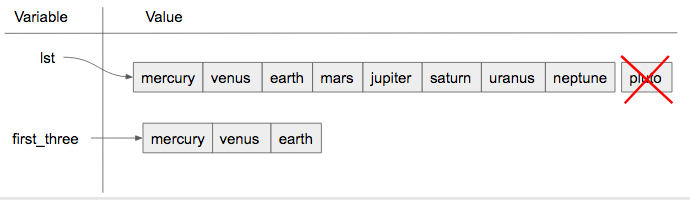

II.
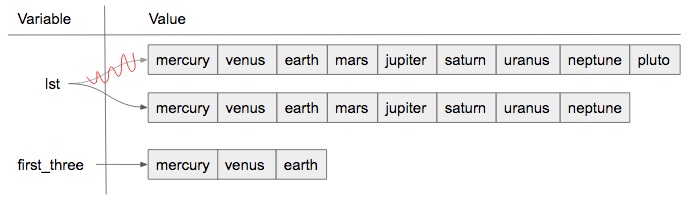

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. I.  
B. II.  
C. Neither is the correct reference diagram.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. I.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, when we are using the remove method, we are just editing the existing list, not making a new copy.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. Which method would you use to figure out the position of an item in a list?
    
  A. .pop()  
  B. .insert()  
  C. .count()  
  D. .index()

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. .index()  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, index will return the position of the first occurance of an item.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Which method is best to use when adding an item to the end of a list?

  A. .insert()  
  B. .pop()  
  C. .append()  
  D. .remove()

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. .append()  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, though you can use insert to do the same thing, you don't need to provide the position.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
4. Write code to add ‘horseback riding’ to the third position (i.e., right before volleyball) in the list <font color=red>sports</font>.

In [ ]:
sports = ['cricket', 'football', 'volleyball', 'baseball', 'softball', 'track and field', 'curling', 'ping pong', 'hockey']

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
sports.insert(2, "horseback riding")
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
5. Write code to take ‘London’ out of the list <font color=red>trav_dest</font>.

In [ ]:
trav_dest = ['Beirut', 'Milan', 'Pittsburgh', 'Buenos Aires', 'Nairobi', 'Kathmandu', 'Osaka', 'London', 'Melbourne']

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
trav_dest.remove("London")
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
6. Write code to add ‘Guadalajara’ to the end of the list <font color=red>trav_dest</font> using a list method.

In [ ]:
trav_dest = ['Beirut', 'Milan', 'Pittsburgh', 'Buenos Aires', 'Nairobi', 'Kathmandu', 'Osaka', 'Melbourne']

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
trav_dest.append("Guadalajara")
```

</details>

<a id='9.16.1'></a>
### 9.16.1. Chapter Assessment - Aliases and References
[Back to top](#Top)

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. What will be the value of <font color=red>a</font> after the following code has executed?

In [ ]:
a = ["holiday", "celebrate!"]
quiet = a
quiet.append("company")

<details><summary>Click here for the solution</summary>

<font color=red>► </font>["holiday", "celebrate!", "company"]  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. Could aliasing cause potential confusion in this problem?

In [ ]:
b = ['q', 'u', 'i']
z = b
b[1] = 'i'
z.remove('i')
print(z)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. yes  
B. no

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. yes  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, b and z reference the same list and changes are made using both aliases.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
3. Could aliasing cause potential confusion in this problem?

In [ ]:
sent = "Holidays can be a fun time when you have good company!"
phrase = sent
phrase = phrase + " Holidays can also be fun on your own!"

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. yes  
B. no

<details><summary>Click here for the solution</summary>

<font color=red>► </font>B. no  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Since a string is immutable, aliasing won't be as confusing. Beware of using something like item = item + new_item with mutable objects though because it creates a new object. However, when we use += then that doesn't happen.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
4. Which of these is a correct reference diagram following the execution of the following code?

In [ ]:
x = ["dogs", "cats", "birds", "reptiles"]
y = x
x += ['fish', 'horses']
y = y + ['sheep']

I.
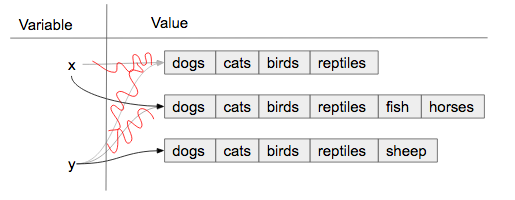

II.
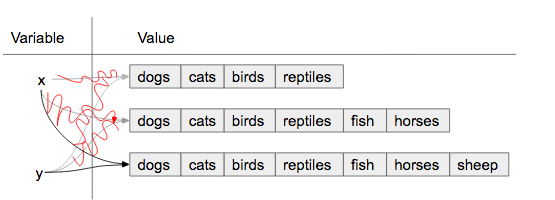

III.
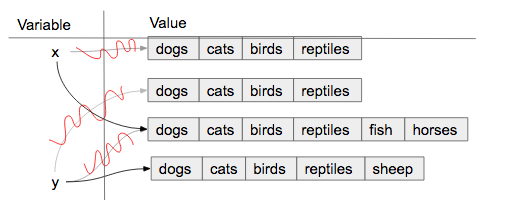

IV.
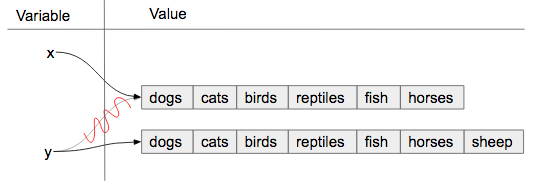

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. I.  
B. II.  
C. III.  
D. IV.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. IV.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, the behavior of obj = obj + object_two is different than obj += object_two when obj is a list. The first version makes a new object entirely and reassigns to obj. The second version changes the original object so that the contents of object_two are added to the end of the first.


</details>

<a id='9.16.2'></a>
### 9.16.2. Chapter Assessment - Split and Join
[Back to top](#Top)

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. Which of these is a correct reference diagram following the execution of the following code?

In [ ]:
sent = "The mall has excellent sales right now."
wrds = sent.split()
wrds[1] = 'store'
new_sent = " ".join(wrds)

I.
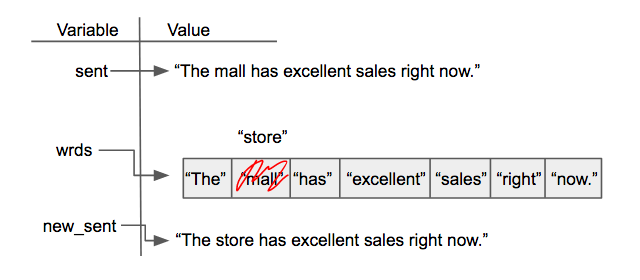

II.
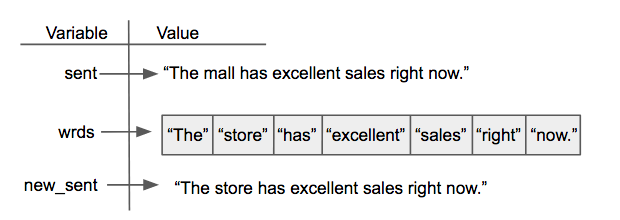

III.
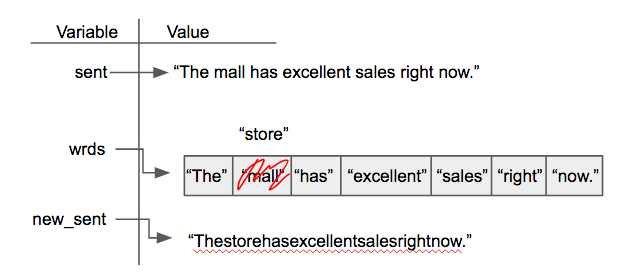

IV.
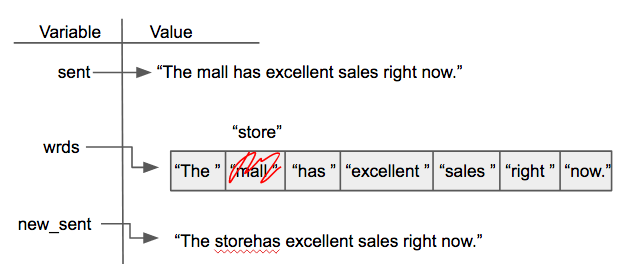

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. I.  
B. II.  
C. III.  
D. IV.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. I.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, when we make our own diagrams we want to keep the old information because sometimes other variables depend on them. It can get cluttered though if there is a lot of information.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. Write code to find the position of the string “Tony” in the list <font color=red>awards</font> and save that information in the variable <font color=red>pos</font>.

In [ ]:
awards = ['Emmy', 'Tony', 'Academy', 'Grammy']

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
pos = awards.index('Tony')
```

</details>

<a id='9.16.3'></a>
### 9.16.3. Chapter Assessment - For Loop Mechanics
[Back to top](#Top)

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
1. Which of these is the accumulator variable?

In [ ]:
byzo = 'hello world!'
c = 0
for x in byzo:
    z = x + "!"
    print(z)
    c = c + 1

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. byzo  
B. x  
C. z  
D. c

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. c  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this is the accumulator variable. By the end of the program, it will have a full count of how many items are in byzo.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
2. Which of these is the sequence?

In [ ]:
cawdra = ['candy', 'daisy', 'pear', 'peach', 'gem', 'crown']
t = 0
for elem in cawdra:
    t = t + len(elem)

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. cawdra  
B. elem  
C. t

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. cawdra  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this is the sequence that we iterate over.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
3. Which of these is the iterator (loop) variable?

In [ ]:
lst = [5, 10, 3, 8, 94, 2, 4, 9]
num = 0
for item in lst:
    num += item

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. item  
B. lst  
C. num

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. item  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this is the iterator variable. It changes each time but is not the whole sequence itself.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
4. What is the iterator (loop) variable in the following?

In [ ]:
rest = ["sleep", 'dormir', 'dormire', "slaap", 'sen', 'yuxu', 'yanam']
let = ''
for phrase in rest:
    let += phrase[0]

<details><summary>Click here for the solution</summary>

<font color=red>► </font>phrase  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct!


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
5. Currently there is a string called <font color=red>str1</font>. Write code to create a list called <font color=red>chars</font> which should contain the characters from <font color=red>str1</font>. Each character in <font color=red>str1</font> should be its own element in the list <font color=red>chars</font>.

In [ ]:
str1 = "I love python"
# HINT: what's the accumulator? That should go here.

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
chars = []
for char in str1:
    chars.append(char)
```

</details>

<a id='9.16.4'></a>
### 9.16.4. Chapter Assessment - Accumulator Pattern
[Back to top](#Top)

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. Given that we want to accumulate the total sum of a list of numbers, which of the following accumulator patterns would be appropriate?

I.

In [ ]:
nums = [4, 5, 2, 93, 3, 5]
s = 0
for n in nums:
    s = s + 1

II.

In [ ]:
nums = [4, 5, 2, 93, 3, 5]
s = 0
for n in nums:
    s = n + n

III.

In [ ]:
nums = [4, 5, 2, 93, 3, 5]
s = 0
for n in nums:
    s = s + n

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. I.  
B. II.  
C. III.  
D. none of the above would be appropriate for the problem.

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. III.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this will solve the problem.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. Given that we want to accumulate the total number of strings in the list, which of the following accumulator patterns would be appropriate?

1.

In [ ]:
lst = ['plan', 'answer', 5, 9.29, 'order, items', [4]]
s = 0
for n in lst:
    s = s + n

2.

In [ ]:
lst = ['plan', 'answer', 5, 9.29, 'order, items', [4]]
for item in lst:
    s = 0
    if type(item) == type("string"):
        s = s + 1

3.

In [ ]:

lst = ['plan', 'answer', 5, 9.29, 'order, items', [4]]
s = ""
for n in lst:
    s = s + n

4.

In [ ]:
lst = ['plan', 'answer', 5, 9.29, 'order, items', [4]]
s = 0
for item in lst:
    if type(item) == type("string"):
        s = s + 1

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>

A. 1.  
B. 2.  
C. 3.  
D. 4.  
E. none of the above would be appropriate for the problem

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. 4.  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this will solve the problem.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Which of these are good names for an accumulator variable? Select as many as apply.

  A. sum  
  B. x  
  C. total  
  D. accum  
  E. none of the above

<details><summary>Click here for the solution</summary>

<font color=red>► </font>C. total  
<font color=red>► </font>D. accum

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct.<br>
C. Yes, total is a good name for accumulating numbers.<br>
D. Yes, accum is a good name. It's both short and easy to remember.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
4. Which of these are good names for an iterator (loop) variable? Select as many as apply.

  A. item  
  B. y  
  C. elem  
  D. char  
  E. none of the above

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. item  
<font color=red>► </font>C. elem  
<font color=red>► </font>D. char

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct.<br>
A. Yes, item can be a good name to use as an iterator variable.<br>
C. Yes, elem can be a good name to use as an iterator variable, especially when iterating over lists.<br>
D. Yes, char can be a good name to use when iterating over a string, because the iterator variable would be assigned a character each time.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
5. Which of these are good names for a sequence variable? Select as many as apply.

  A. num_lst  
  B. p  
  C. sentence  
  D. names  
  E. none of the above

<details><summary>Click here for the solution</summary>

<font color=red>► </font>A. num_lst  
<font color=red>► </font>C. sentence  
<font color=red>► </font>D. names

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Correct.<br>
A. Yes, num_lst is good for a sequence variable if the value is actually a list of numbers.<br>
C. Yes, this is good to use if the for loop is iterating through a string.<br>
D. Yes, names is good, assuming that the for loop is iterating through actual names and not something unrelated to names.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
6. Given the following scenario, what are good names for the accumulator variable, iterator variable, and sequence variable? You are writing code that uses a list of sentences and accumulates the total number of sentences that have the word ‘happy’ in them.

  A. accumulator variable: x | iterator variable: s | sequence variable: lst  
  B. accumulator variable: total | iterator variable: s | sequence variable: lst  
  C. accumulator variable: x | iterator variable: sentences | sequence variable: sentence_lst  
  D. accumulator variable: total | iterator variable: sentence |sequence variable: sentence_lst  
  E. none of the above

<details><summary>Click here for the solution</summary>

<font color=red>► </font>D. accumulator variable: total | iterator variable: sentence |sequence variable: sentence_lst  

<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>✔️ Yes, this combination of variable names is the clearest.


</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
7. For each character in the string saved in <font color=red>ael</font>, append that character to a list that should be saved in a variable <font color=red>app</font>.

In [ ]:
ael = "python!"

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
app = []
for char in ael:
    app.append(char)
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
8. For each string in <font color=red>wrds</font>, add ‘ed’ to the end of the word (to make the word past tense). Save these past tense words to a list called <font color=red>past_wrds</font>.

In [ ]:
wrds = ["end", 'work', "play", "start", "walk", "look", "open", "rain", "learn", "clean"]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
past_wrds = []
for wrd in wrds:
    past_wrds.append(wrd + "ed")
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
9. Write code to create a __list of word lengths__ for the words in <font color=red>original_str</font> using the accumulation pattern and assign the answer to a variable <font color=red>num_words_list</font>. (You should use the <font color=red>len</font> function).

In [ ]:
original_str = "The quick brown rhino jumped over the extremely lazy fox"

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
word_list = original_str.split()
num_words_list = []
for word in word_list:
    num_words_list.append(len(word))
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
10. Create an empty string and assign it to the variable <font color=red>lett</font>. Then using range, write code such that when your code is run, <font color=red>lett</font> has 7 b’s (<font color=red>"bbbbbbb"</font>).

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
lett = ""
for _ in range(7):
    lett += "b"
```

</details>

<a id='9.16.5'></a>
### 9.16.5. Chapter Assessment - Problem Solving
[Back to top](#Top)

#### Check your understanding
<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
1. Below are a set of scores that students have received in the past semester. Write code to determine how many are 90 or above and assign that result to the value <font color=red>a_scores</font>.

In [ ]:
scores = "67 80 90 78 93 20 79 89 96 97 92 88 79 68 58 90 98 100 79 74 83 88 80 86 85 70 90 100"

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
a_scores = 0
scores_lst = scores.split()
for score in scores_lst:
    if int(score) >= 90:
        a_scores += 1
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
2. Write code that uses the string stored in <font color=red>org</font> and creates an acronym which is assigned to the variable <font color=red>acro</font>. Only the first letter of each word should be used, each letter in the acronym should be a capital letter, and there should be nothing to separate the letters of the acronym. Words that should not be included in the acronym are stored in the list <font color=red>stopwords</font>. For example, if <font color=red>org</font> was assigned the string “hello to world” then the resulting acronym should be “HW”.

In [ ]:
stopwords = ['to', 'a', 'for', 'by', 'an', 'am', 'the', 'so', 'it', 'and', "The"]
org = "The organization for health, safety, and education"

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
acro = ""
org_lst = org.split()
for word in org_lst:
    if word not in stopwords:
        acro = acro + word[0].upper()
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
3. Write code that uses the string stored in <font color=red>sent</font> and creates an acronym which is assigned to the variable <font color=red>acro</font>. The first two letters of each word should be used, each letter in the acronym should be a capital letter, and each element of the acronym should be separated by a “. ” (dot and space). Words that should not be included in the acronym are stored in the list <font color=red>stopwords</font>. For example, if <font color=red>sent</font> was assigned the string “height and ewok wonder” then the resulting acronym should be “HE. EW. WO”.

In [ ]:
stopwords = ['to', 'a', 'for', 'by', 'an', 'am', 'the', 'so', 'it', 'and', 'The']
sent = "The water earth and air are vital"

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
acro = ""
sent_lst = sent.split()
for word in sent_lst:
    if word not in stopwords:
        acro = acro + word[0:2].upper()
        if word != sent_lst[-1]:
            acro = acro + ". "
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
4. A palindrome is a phrase that, if reversed, would read the exact same. Write code that checks if <font color=red>r_phrase</font> is a palindrome by reversing it and then checking if the reversed version is equal to the original. Assign the reversed version of <font color=red>r_phrase</font> to the variable <font color=red>r_phrase</font> so that we can check your work.

In [ ]:
p_phrase = "was it a car or a cat I saw"

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
r_phrase = ""
for index in range(len(p_phrase)):
    r_phrase = p_phrase[index] + r_phrase  
if p_phrase.lower() == r_phrase.lower():
    print("The phrase '{}' is a palindrome".format(p_phrase))
else:
    print("The phrase '{}' is no a palindrome".format(p_phrase))
```

</details>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<font color=black>
    
5. Provided is a list of data about a store’s inventory where each item in the list represents the name of an item, how much is in stock, and how much it costs. Print out each item in the list with the same formatting, using the .format method (not string concatenation). For example, the first print statment should read <font color=red>The store has 12 shoes, each for 29.99 USD.</font>

In [ ]:
inventory = ["shoes, 12, 29.99", "shirts, 20, 9.99", "sweatpants, 25, 15.00", "scarves, 13, 7.75"]

<details><summary>Click here for a solution</summary>
<div class="alert alert-block alert-success" style="margin-top: 20px">
<font color=black>
    
```python
for item in inventory:
    item_lst = item.split(", ")
    print("The store has {} {}, each for {} USD.".format(item_lst[1], 
                                                         item_lst[0], 
                                                         item_lst[2]))
```

</details>